### 1. Importing Data from Data Wrangling Step

In [9]:
# Importing the required library and load the clean data set
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
%matplotlib inline

parentDirectory = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
filePath = os.path.join(parentDirectory,'data','auto85_clean.csv')
dfAuto = pd.read_csv(filePath)
dfAuto.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,9.0,low,5000.0,21,27,13495.0,0,1,1,0
1,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,9.0,low,5000.0,21,27,16500.0,0,1,1,0
2,1,122.0,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,9.0,medium,5000.0,19,26,16500.0,0,1,1,0
3,2,164.0,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,10.0,low,5500.0,24,30,13950.0,0,1,1,0
4,2,164.0,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,8.0,low,5500.0,18,22,17450.0,0,1,1,0


### 2. Identifying/Analyzing patterns

In [10]:
# check which variable has co-relation with Price Target Variable
dfAuto.corr()
#dfAuto.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,peak-rpm,city-mpg,highway-mpg,price,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.139896,-0.007992,-0.182196,0.279719,-0.035527,0.036233,-0.082391,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029800,0.055127,-0.114713,0.239544,-0.225016,-0.181877,0.133999,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493203,0.157964,0.250313,-0.360233,-0.470606,-0.543304,0.584642,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608941,0.123913,0.159733,-0.286035,-0.665192,-0.698142,0.690628,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544879,0.188814,0.189867,-0.245852,-0.633531,-0.680635,0.751265,0.244356,-0.244356,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180327,-0.060822,0.259737,-0.309913,-0.049800,-0.104812,0.135486,0.281578,-0.281578,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644041,0.167412,0.156433,-0.279350,-0.749543,-0.794889,0.834415,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572516,0.205806,0.028889,-0.256753,-0.650546,-0.679571,0.872335,0.070779,-0.070779,-0.110040,0.110040
bore,-0.139896,-0.029800,0.493203,0.608941,0.544879,0.180327,0.644041,0.572516,1.000000,-0.055390,0.001250,-0.267338,-0.582121,-0.591390,0.543154,0.054435,-0.054435,-0.227782,0.227782
stroke,-0.007992,0.055127,0.157964,0.123913,0.188814,-0.060822,0.167412,0.205806,-0.055390,1.000000,0.187854,-0.063720,-0.034079,-0.034741,0.082267,0.241033,-0.241033,-0.218190,0.218190


#### Corelation of independent variable with target variable 'price'
    - Continious Variables
        - engine-size (+)
        - stroke ( + weak)
        - highway-mpg (-)
        - peak-rpm (- weak)
    - Categorical Variables

In [11]:
# Confirming the above relation for Continious Variables
dfAuto[['engine-size', 'stroke', 'highway-mpg', 'peak-rpm', 'price']].corr()

,engine-size,stroke,highway-mpg,peak-rpm,price
engine-size,1.000000,0.205806,-0.679571,-0.256753,0.872335
stroke,0.205806,1.000000,-0.034741,-0.063720,0.082267
highway-mpg,-0.679571,-0.034741,1.000000,-0.058605,-0.704692
peak-rpm,-0.256753,-0.063720,-0.058605,1.000000,-0.101542
price,0.872335,0.082267,-0.704692,-0.101542,1.000000


#### Positive Linear Relationship

(0, 56059.95365577285)

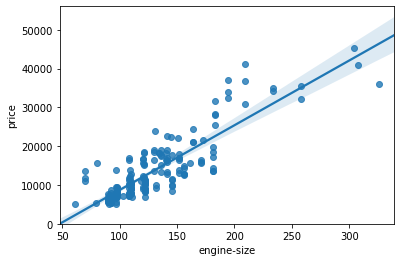

In [21]:
# Plotting the relation
#help(sns.regplot)
sns.regplot(x = "engine-size", y = "price", data = dfAuto)
plt.ylim(0,)

#### Weak Positive Linear Relationship

(0, 47436.148325769056)

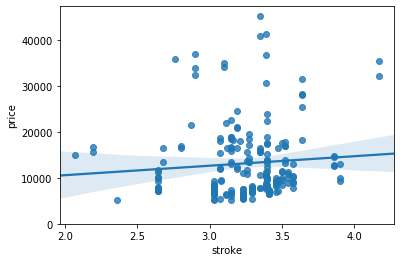

In [22]:
# Relation between stroke and price
sns.regplot(x = "stroke", y = "price", data = dfAuto)
plt.ylim(0,)

#### Negative Linear Relationship

(0, 48273.32388136698)

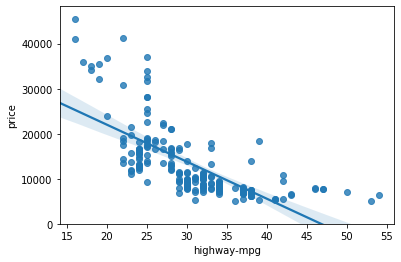

In [24]:
# Plotting the relationship between highway-mpg with price
sns.regplot(x = "highway-mpg", y = "price", data = dfAuto)
plt.ylim(0,)

#### Weak negative linear relationship

(0, 47436.148325769056)

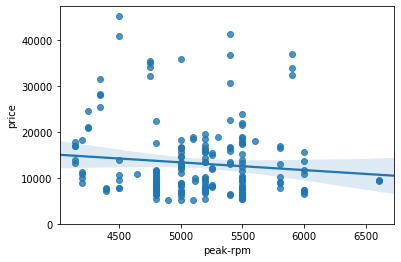

In [25]:
# Plotting the relation betwen peak-rpm and price variable
sns.regplot(x = "peak-rpm", y = "price", data = dfAuto)
plt.ylim(0,)